In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fastcluster
import warnings
warnings.filterwarnings("ignore")
 
#package to use 
import scipy.cluster.hierarchy 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

In [85]:
df = pd.read_csv('Mall_Customers.csv')
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [86]:
datasubset = df.loc[:, ["Age", "Annual Income (k$)"]]

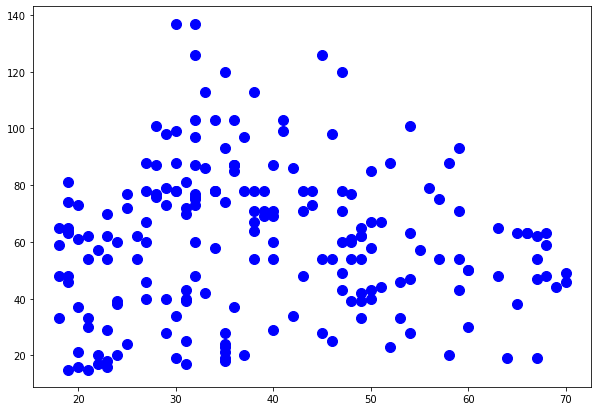

In [87]:
plt.figure(figsize=(10,7))
plt.scatter(datasubset[["Age"]],
            datasubset[["Annual Income (k$)"]], s=100, c="blue")

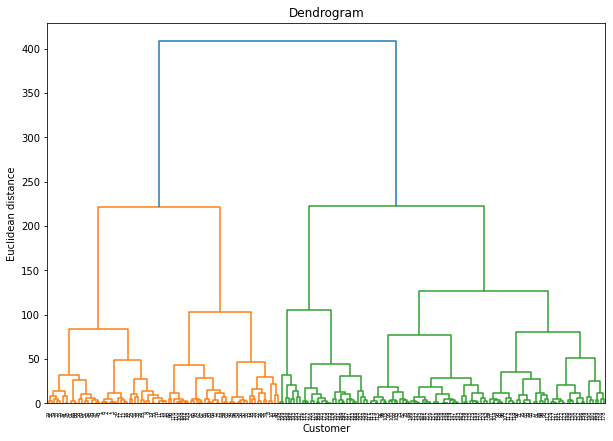

In [88]:
plt.figure(figsize = (10,7))
dendrogram = sch.dendrogram(sch.linkage(datasubset, method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show()

In [89]:
cluster = AgglomerativeClustering(n_clusters=2, )
cluster.fit_predict(datasubset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [90]:
cl = cluster.fit_predict(datasubset)

In [91]:
from sklearn.metrics import silhouette_score

In [92]:
silhouette_score(datasubset, cl)

0.4104652474372429

In [93]:
X = datasubset.values

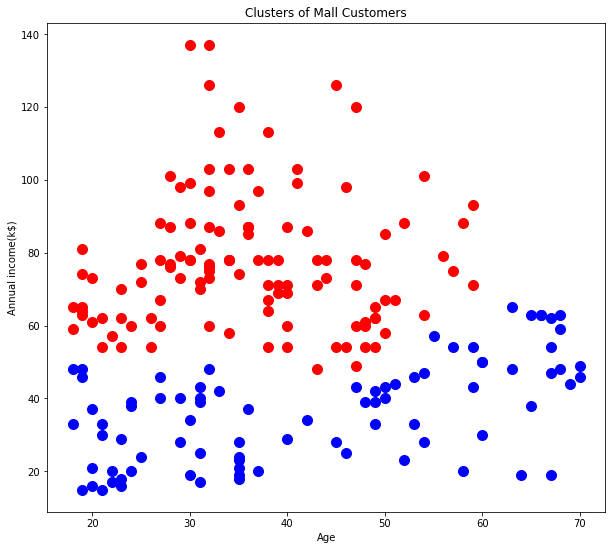

In [94]:
plt.figure(figsize = (10, 9))
plt.scatter(X[cl==0,0], X[cl ==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[cl==1,0], X[cl ==1, 1], s=100, c='blue', label='Cluster 2')
plt.title('Clusters of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual income(k$)')
plt.show()

In [95]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

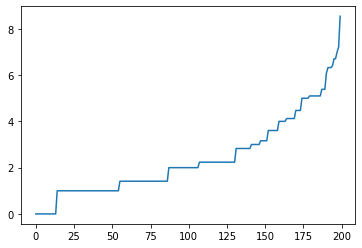

In [96]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [97]:
from sklearn.cluster import DBSCAN
dbscancluster = DBSCAN(eps =7, min_samples=5)
dbscancluster.fit(X)
clusters = dbscancluster.labels_

In [98]:
len(set(clusters))
silhouette_score(X, clusters)

0.28705019416571775

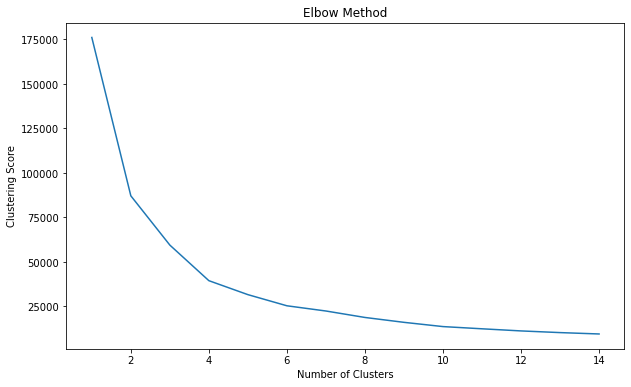

In [99]:
from sklearn.cluster import KMeans
individual_clustering_score = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init ='random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_)
    

plt.figure(figsize =(10,6))
plt.plot(range(1,15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()


In [104]:
kmeans =KMeans(n_clusters=2, random_state = 42)
kmeans.fit(X)
pred =kmeans.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
from sklearn.preprocessing import normalize
scaled = normalize(X)
scaled = pd.DataFrame(data_scaled)
scaled.head()

In [107]:
kmeans =KMeans(n_clusters=2, random_state = 42)
kmeans.fit(scaled)
pred =kmeans.predict(scaled)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

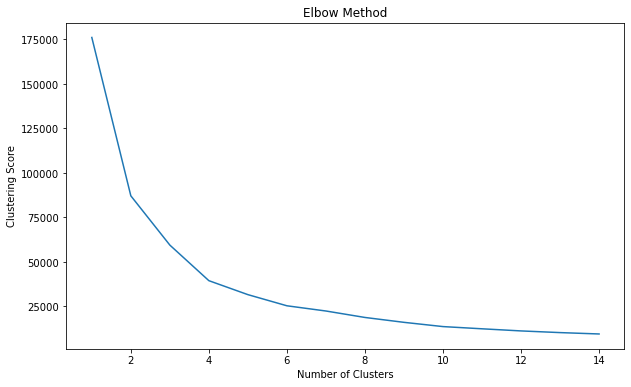

In [109]:
from sklearn.cluster import KMeans
individual_clustering_score = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init ='random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_)
    

    
plt.figure(figsize =(10,6))
plt.plot(range(1,15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()
